# A glimpse into TA...

### Let's check out what our data looks like

In [528]:
import pandas
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np
import math
import random
from bs4 import BeautifulSoup

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  DEPRECATION: bs4 is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for bs4 ... done

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [59]:
posts.drop_duplicates(keep = 'first', inplace=True)
post_row_count = posts.shape[0] # returns nb of lines

comments.drop_duplicates(keep = 'first', inplace=True)
comment_row_count = comments.shape[0] # returns nb of lines
print("","unique post number:", post_row_count,"\n", "unique comment number:", comment_row_count,"\n", "average comment per post:", comment_row_count / post_row_count) 


 unique post number: 3144 
 unique comment number: 66903 
 average comment per post: 21.279580152671755


Lots of duplicates shows my pagination loop probably needs some fixing up

In [406]:
most_answered_post = max(posts['num_comments'])
best_rated_comment = max(comments['comment_score'])
least_answered_post = min(posts['num_comments'])
worst_rated_comment = min(comments['comment_score'])

print("Range of number of answers on a post =", "[" + str(least_answered_post) + " , " + str(most_answered_post) +"]")
print("Range of comment scores =", "[" + str(worst_rated_comment) + " , " + str(best_rated_comment) +"]")


Range of number of answers on a post = [1 , 7168]
Range of comment scores = [-126 , 55462]


Let's try and get some statistical data on posts & comments to get a sense of our dataset quality

Text(330, 0.001, 'PDF curve')

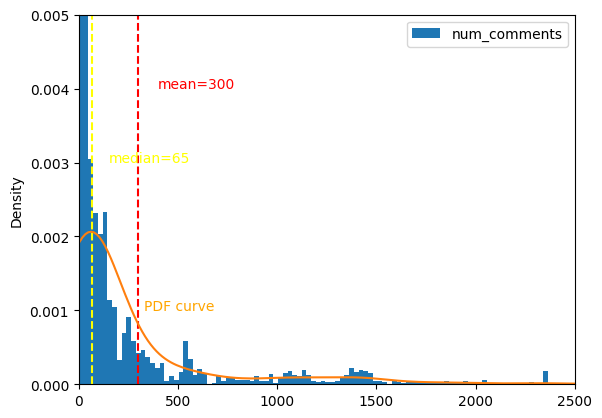

In [389]:
posts.plot.hist(column="num_comments", bins = 300, density = True, xlim=[0, 2500], ylim = [0, 0.005])

mean = posts["num_comments"].mean()
plt.axvline(mean, color='red', linestyle='dashed')
plt.text(400, .004,'mean=' + str(round(mean)), color='red')

median = posts["num_comments"].median()
plt.axvline(median, color='yellow', linestyle='dashed')
plt.text(150, .003, 'median=' + str(round(median)), color='yellow')

# kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable
posts["num_comments"].plot.kde()
plt.text(330, .001, 'PDF curve', color='orange')



Text(150, 0.003, 'median=17')

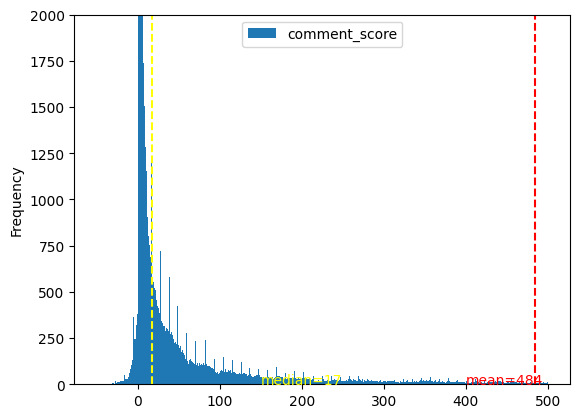

In [397]:
comments.plot.hist(column="comment_score", bins = 300, range=[-50, 500], ylim = [0, 2000])
mean = comments["comment_score"].mean()
plt.axvline(mean, color='red', linestyle='dashed')
plt.text(400, .004,'mean=' + str(round(mean)), color='red')
median = comments["comment_score"].median()
plt.axvline(median, color='yellow', linestyle='dashed')
plt.text(150, .003, 'median=' + str(round(median)), color='yellow')


High mean of comment score may be explained because of very high max values(55462) and good quality comments since they were sorted by top comments

### Let's try and clean up our data

#### Posts

In [562]:
pandas.set_option("display.max_colwidth", 50)
posts = pandas.read_csv('../data/posts_v2_2.csv', names=['post_id', 'post_title', 'num_comments', 'post_content', 'post_url'])
posts.head()

,post_id,post_title,num_comments,post_content,post_url
0,10p0glu,AITA for saying my mother is insensitive for c...,1054,"I’m 21F, recently welcomed my own child into t...",https://www.reddit.com/r/AmItheAsshole/comment...
1,10p55w6,AITA for having my adult daughter pay half of ...,495,I [52F] am having my adult daughter [25F] pay ...,https://www.reddit.com/r/AmItheAsshole/comment...
2,10pgsmn,AITA for having an 18+ house?,472,My (32f) and my husband (30m) are childfree by...,https://www.reddit.com/r/AmItheAsshole/comment...
3,10ovk6p,AITA for refusing to take a DNA test to confir...,1366,So my (27M) fiancé (26F) is adopted. She was a...,https://www.reddit.com/r/AmItheAsshole/comment...
4,10p9z0a,AITA for telling my soon to be SIL that I didn...,109,My brother is getting married in May. My broth...,https://www.reddit.com/r/AmItheAsshole/comment...


Handling quotes and \

In [563]:
for content in posts['post_content']:
    initial_string = content
    output_string ="""{0}"""
    content = output_string

Control Check

In [506]:
pandas.set_option("display.max_colwidth", 500)
print(posts['post_content'][random.randrange(0,100)])

So this is a pretty low-stakes argument but me (f26)and my sister (f24) are at an impasse. When we were kids we inherited a ring each from our great-grandmother. I don’t know anything about jewellery terms/designs, but mine has five oval rubies in a row, and my sisters was one solitaire. Since then they haven’t ever really been worn, to the point that I often forgot they existed. Occasionally they came out and we tried them on for fun, but they’re expensive enough we weren’t allowed to wear them every day. Currently my sister lives with our parents, and I live on my own a couple of hours away. Sometime last week the rings made a reappearance, and my sister sent me a picture of her wearing my ring. Out text conversation was literally - Me: is that my ring? Sis: haha yeah. I’m getting mine resized so I can finally wear it.I did not care that she was wearing it at the time but it did occur to me to get it when I next visited them and bring it back to my house.So I arrived at our parents y

#### Comments

In [598]:
pandas.set_option("display.max_colwidth", 50)
comments = pandas.read_csv('../data/comments_v2_2.csv', names=['post_id', 'comment_id', 'comment_score', 'comment_content', 'comment_permalink'])
comments.head()

,post_id,comment_id,comment_score,comment_content,comment_permalink
0,t3_10p0glu,j6hpif3,9787,YTA &gt;I know it wasn’t her job to forgive h...,/r/AmItheAsshole/comments/10p0glu/aita_for_say...
1,t3_10p0glu,j6hpzqy,3137,"YTA. Your father abused her. Also, who are you...",/r/AmItheAsshole/comments/10p0glu/aita_for_say...
2,t3_10p0glu,j6hpkvv,1972,YTA. Your dad was abusive to your mother. Of...,/r/AmItheAsshole/comments/10p0glu/aita_for_say...
3,t3_10p0glu,j6hqzyp,1295,Yta so you acknowledge that your dad was abusi...,/r/AmItheAsshole/comments/10p0glu/aita_for_say...
4,t3_10p0glu,j6hploi,585,YTA Your dad sounded like an AH. It's unders...,/r/AmItheAsshole/comments/10p0glu/aita_for_say...


Handling html tags & id format

In [609]:
for content in comments['comment_content']:
    clean_content = BeautifulSoup(content, "html.parser").text
    content = clean_content

In [ ]:
for post_id in comments['post_id']:
    clean_id = post_id[3:]
    comments['post_id'] = clean_id

Control Check

In [ ]:
pandas.set_option("display.max_colwidth", 500)
rand = random.randrange(0,100)
print(comments['post_id'][rand], comments['comment_content'][rand])
print(comments['post_id'][rand], BeautifulSoup(comments['comment_content'][rand], "html.parser").text)

### Let's try and join our comments to our posts

In [ ]:
df = posts.merge(comments, left_on='post_id', right_on='post_id', how='left')
df_light = df.drop(['comment_permalink', 'num_comments', 'post_url'], axis=1)  # axis 1 = column

print(df_light)